In [1]:
import pycountry


# for 80
with open('enwiki-20150112-400-r10-105752.txt', encoding='utf-8') as r, \
        open('tokens.txt', 'w', encoding='utf-8') as w:
    for line in r:
        w.write(' '.join(
            [token.strip('.,!?;:()[]\'\"') for token in line.split()]
        ) + '\n')

# for 81
with open('tokens.txt', encoding='utf-8') as r, \
        open('corpus.txt', 'w', encoding='utf-8') as w:
    text = r.read()
    for country in pycountry.countries:
        text = text.replace(country.name, country.name.replace(' ', '_'))
    w.write(text)

In [2]:
from gensim.models import word2vec


# generate model
sentences = word2vec.LineSentence('corpus.txt', max_sentence_length=3000000)
model = word2vec.Word2Vec(sentences, size=100)

In [3]:
# 90

# for 86
print(model['United_States'][:5])

# for 87
print(model.similarity('United_States', 'U.S'))

# for 88
for r in model.most_similar(positive=['England'], topn=10):
    print(r)

# for 89
for r in model.most_similar(
        positive=['Spain', 'Athens'],
        negative=['Madrid'],
        topn=10):
    print(r)

[-4.05895662  0.01686332  2.75084519  2.16884565  0.44430164]
0.898108239218
('Scotland', 0.8361656069755554)
('Wales', 0.8051247596740723)
('Cornwall', 0.7136638760566711)
('Hampshire', 0.7108010649681091)
('Britain', 0.7062363028526306)
('Ireland', 0.7034316062927246)
('Lancashire', 0.6995648145675659)
('London', 0.6793556809425354)
('Plymouth', 0.6771773099899292)
('Essex', 0.6721650958061218)
('Greece', 0.7830344438552856)
('Egypt', 0.7250207662582397)
('Crete', 0.724615216255188)
('Byzantium', 0.7100664377212524)
('Persia', 0.6984169483184814)
('Iberia', 0.6981300711631775)
('Sicily', 0.6753319501876831)
('Gaul', 0.674604594707489)
('Italy', 0.6712899208068848)
('Armenia', 0.6669895052909851)


In [4]:
# 91

import re


with open('questions-words.txt', encoding='utf-8') as r, \
        open('questions-family.txt', 'w', encoding='utf-8') as w:
    w.write(re.search('(: family.*?):', r.read(), re.DOTALL).group(1))

In [5]:
# 92

with open('questions-family.txt', encoding='utf-8') as r, \
        open('analogy-family-w2v.txt', 'w', encoding='utf-8') as w:
    next(r)
    for line in r:
        words = line.split()
        analogs = model.most_similar(
            positive=[words[1], words[2]],
            negative=[words[0]],
            topn=1)
        w.write(line.strip() + ' {} {}\n'.format(*analogs[0]))

In [6]:
# 93

accuracies = model.accuracy('questions-family.txt')
for acc in accuracies:
    if acc['section'] == 'total':
        cor = len(acc['correct'])
        incor = len(acc['incorrect'])
        print(cor / (cor + incor))

0.8567251461988304


In [7]:
# 94

with open('combined.csv', encoding='utf-8') as r, \
        open('wordsim-353-w2v.txt', 'w', encoding='utf-8') as w:
    next(r)
    for line in r:
        w1, w2, _ = line.split(',')
        sim = model.similarity(w1, w2)
        w.write(line.strip() + ',{}\n'.format(sim))

In [8]:
# 95

from scipy.stats import stats, spearmanr


with open('wordsim-353-w2v.txt', encoding='utf-8') as f:
    human_sim, nlp_sim = list(zip(
        *[map(float, line.strip().split(',')[2:4]) for line in f]))

print(spearmanr(stats.rankdata(human_sim), stats.rankdata(nlp_sim)))

SpearmanrResult(correlation=0.64240646738607543, pvalue=1.8037302626410021e-42)


In [9]:
# 96

from itertools import islice


for c in islice(pycountry.countries, 5, 10):
    print(c.name, model[c.name.replace(' ', '_')][:5])

Andorra [-1.87523413  0.08940049  0.07418787  0.34729031 -0.60809666]
Angola [-2.21939349 -0.0144756   0.66420549  0.84874803  0.10048538]
Anguilla [-0.21235339 -0.36662307 -0.30534551 -0.21968554 -0.0643254 ]
Antarctica [-1.62620783 -0.86220443  1.17329419  0.13058408  0.5607028 ]
Antigua and Barbuda [-0.3267704  -0.12962988  0.03579212  0.26498678 -0.12726122]


In [10]:
# 97

from sklearn.cluster import k_means


X = [model[name] for name in
    [c.name.replace(' ', '_') for c in pycountry.countries] if name in model]
cluster = k_means(X, 5)

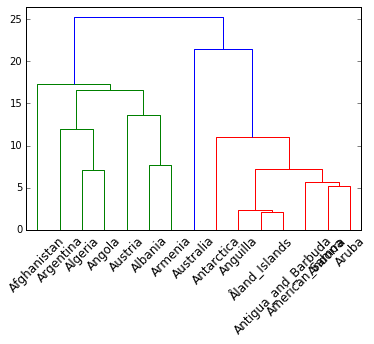

In [11]:
# 98

%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram


n = 15
names = [name for name in 
    [c.name.replace(' ', '_') for c in pycountry.countries] if name in model][:n]
X = [model[name] for name in names]

dendrogram(ward(X), labels=names, leaf_rotation=45)
plt.show()

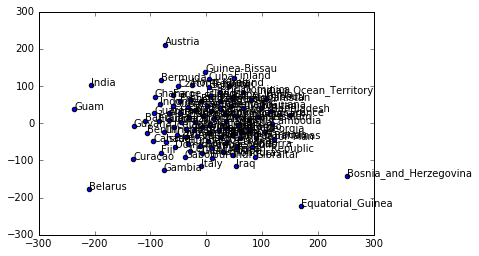

In [12]:
# 99

from sklearn.manifold import TSNE


n = 100
names = [name for name in 
    [c.name.replace(' ', '_') for c in pycountry.countries] if name in model][:n]
X = [model[name] for name in names]
tsne = TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X)

_, ax = plt.subplots()
ax.scatter(Y[:, 0], Y[:, 1])
for i, name in enumerate(names):
    ax.annotate(name, (Y[i, 0],Y[i, 1]))
plt.show()